# For efficent state management to to use the multi-ai agents
`We need to design workflow and logics`

`Its provide huge fiexiablity, we can write valid logics`

`Its related to scalability-Because its can handle high volume Interactions`

`Fault Tolerance-It will be able to handle erros, if one agents faild to error then other agents can handle it.`

In [7]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmith=userdata.get("LANGSMITH_API_KEY")

In [8]:
## To setup the LangGraph
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CHATBOTuSING_LANGgRAPH"


In [9]:
from langchain_groq import ChatGroq

In [11]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")

## Start Building Chatbot using langGraph

In [13]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [14]:
class State(TypedDict):
  # Messages have the type "list". the `add_messages` function
  # in the annotation defines how this state key should be udated
  # (in this case, it appedns messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_bulder = StateGraph(State)

In [15]:
graph_bulder

In [16]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [17]:
graph_bulder.add_node("chatbot", chatbot)

In [18]:
graph_bulder.add_edge(START, "chatbot")
graph_bulder.add_edge("chatbot", END)

In [19]:
graph = graph_bulder.compile()

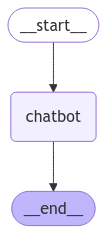

In [20]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [21]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit", 'q']:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value["messages"])
      print("Assistant:",value['messages'].content)

User: Assalamualikum
dict_values([{'messages': AIMessage(content='Wa alaikum assalam! 😊\n\nHow can I help you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 13, 'total_tokens': 31, 'completion_time': 0.032727273, 'prompt_time': 9.034e-05, 'queue_time': 0.020145629999999998, 'total_time': 0.032817613}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-72d5ae27-b7bd-4fe9-8d20-ac940a0848fa-0', usage_metadata={'input_tokens': 13, 'output_tokens': 18, 'total_tokens': 31})}])
content='Wa alaikum assalam! 😊\n\nHow can I help you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 13, 'total_tokens': 31, 'completion_time': 0.032727273, 'prompt_time': 9.034e-05, 'queue_time': 0.020145629999999998, 'total_time': 0.032817613}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason'

# LangGraph Catbot With Tools